In [108]:
from tqdm import tqdm
from qiskit import quantum_info
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
#from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeParis
from numpy.linalg import norm 
import cvxpy
#set noisy simulator backend 
backend = AerSimulator.from_backend(FakeParis())
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
#visualization
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import Parameter
from qiskit.primitives import Estimator
v

In [436]:
# Step 1: Define operator

n=10
h=1
J=3
tau=0.1
m=0
layers=50
k=1
# Step 2: Define quantum state
qc = QuantumCircuit(n)
QuantumCircuit.initialize(qc,'1111111111',[0,1,2,3,4,5,6,7,8,9])
sigma_z= np.array([[1,0],[0,-1]])
#prepare ancilla
#qc.h(0)
#creation of controlled unitary
cu_gate = UnitaryGate(sigma_z, label='CU') #this gate will have to be the whole evolution circuit 

# Apply the controlled unitary operation with control qubit 0 and target qubit 1
#qc.append(cu_gate.control(), [0, 1])
qc.barrier(range(n))
#anti-controlled operation



while m<layers:
    for i in range(n):
        qc.rx(tau*h,i)
    for j in range(n//2):
        qc.rzz(tau*J, 2*j,2*j+1)
    for j in range(n//2):
        if j == (n/2 - 1):
                break
        qc.rzz(tau*J, 2*j+1,2*j+2)
    qc.barrier(range(n))
    m+=1
    
    
anti_gate = cu_gate.control(ctrl_state='0')
#qc.append(anti_gate, [0, j+1])
qc.barrier(range(n))




estimator = Estimator() 
basis_gates=['cx', 'id', 'rz', 'x', 'sx']
qcc=transpile(qc, basis_gates=basis_gates, optimization_level=3)

In [396]:
op1 = SparsePauliOp("XIIIIIIIII",coeffs=[1])
op2 = SparsePauliOp("YIIIIIIIII",coeffs=[1])
expectation_value_x = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_y = estimator.run(qcc, op2, shots=8000).result().values
corr[j] = expectation_value_x + 1j*expectation_value_y
print("expectation value, distance="+str(k)+": ", expectation_value_x + 1j*expectation_value_y)

expectation value, distance=1:  [0.49395429-0.07237837j]


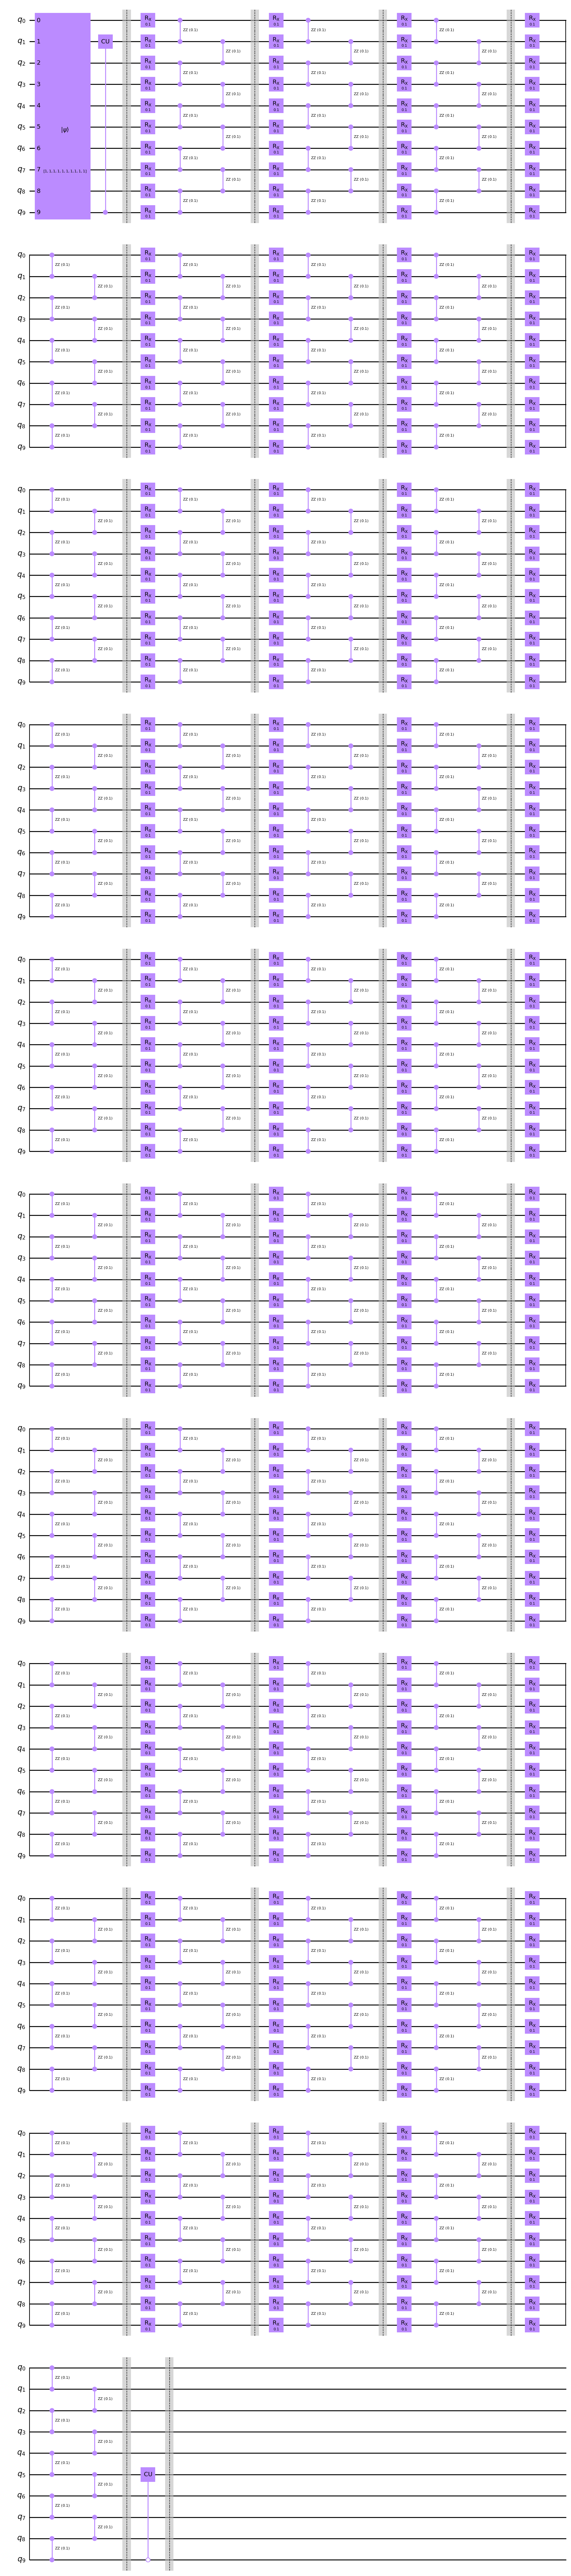

In [394]:
dispcolors = {'cx':('#426299', '#000000'),
              'cswap':('#705399', '#000000'),
              'cp':('#CFFF8B', '#000000')}

qc.draw(output='mpl',style={'displaycolor':dispcolors}, filename='my_circuit.pdf')



In [256]:
print(corr)

[0.       +0.j        0.       +0.j        0.       +0.j
 0.       +0.j        0.0040632+0.0012053j 0.       +0.j
 0.       +0.j        0.       +0.j        0.       +0.j       ]


In [257]:
corr = np.zeros(9,dtype=complex)

In [437]:
op1 = SparsePauliOp("ZZIIIIIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IZIIIIIIII",coeffs=[1])

dist=1
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij1 = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij1)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.90266331]
expectation sigma_i:  [-0.89780313]
expectation sigma_j:  [-0.88999403]
C_ij:  [1.00628718]


In [438]:
op1 = SparsePauliOp("ZIZIIIIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIZIIIIIII",coeffs=[1])

dist=2
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij2 = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij2)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.87520889]
expectation sigma_i:  [-0.89843381]
expectation sigma_j:  [-0.86509135]
C_ij:  [0.97319046]


In [439]:
op1 = SparsePauliOp("ZIIZIIIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIZIIIIII",coeffs=[1])

dist=3
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij3 = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij3)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.84662396]
expectation sigma_i:  [-0.90150365]
expectation sigma_j:  [-0.85143744]
C_ij:  [0.92567397]


In [440]:
op1 = SparsePauliOp("ZIIIZIIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIZIIIII",coeffs=[1])

dist=4
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij4 = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij4)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.801569]
expectation sigma_i:  [-0.89945156]
expectation sigma_j:  [-0.8475049]
C_ij:  [0.84084841]


In [441]:
op1 = SparsePauliOp("ZIIIIZIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIZIIII",coeffs=[1])

dist=5
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij5 = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij5)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.77867254]
expectation sigma_i:  [-0.90240046]
expectation sigma_j:  [-0.84792162]
C_ij:  [0.79218021]


In [442]:
op1 = SparsePauliOp("ZIIIIIZIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIIZIII",coeffs=[1])

dist=6
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij6 = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij6)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.77312765]
expectation sigma_i:  [-0.89665582]
expectation sigma_j:  [-0.85377508]
C_ij:  [0.78071291]


In [443]:
op1 = SparsePauliOp("ZIIIIIIZII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIIIZII",coeffs=[1])

dist=7
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij7 = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij7)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.78274276]
expectation sigma_i:  [-0.9006876]
expectation sigma_j:  [-0.86743541]
C_ij:  [0.7841972]


In [444]:
op1 = SparsePauliOp("ZIIIIIIIZI",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIIIIZI",coeffs=[1])

dist=8
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij8 = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij8)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.79963679]
expectation sigma_i:  [-0.89912759]
expectation sigma_j:  [-0.88721862]
C_ij:  [0.80155083]


In [445]:
op1 = SparsePauliOp("ZIIIIIIIIZ",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIIIIIZ",coeffs=[1])

dist=9
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=80000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=80000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=80000).result().values
corr_ij = 2*expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij9)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.80889338]
expectation sigma_i:  [-0.90033348]
expectation sigma_j:  [-0.89978434]
C_ij:  [-0.0295687]


In [446]:
corr_ij_dict = {}
for f in range(1, n):
    corr_ij_dict[f] = globals().get(f"corr_ij{f}")

# Convert the dictionary values to a NumPy array
correlations = np.array(list(corr_ij_dict.values()))


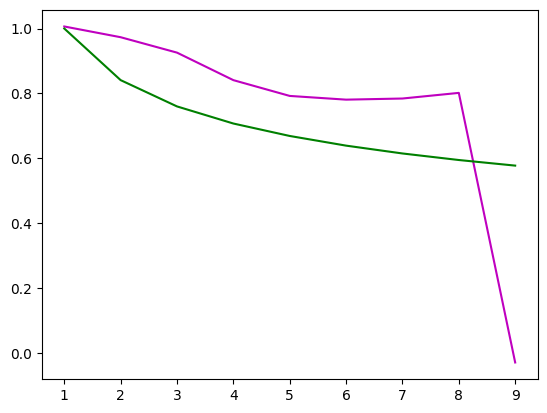

In [447]:
distances=np.array([i for i in range(1,n)], dtype=float)

plt.plot(distances, correlations, c='m')
plt.plot(distances, 1/distances**(1/4),c='g')

In [378]:
from scipy.optimize import curve_fit


def my_curve_function(x, a):
    return 1/x**a

params, covariance = curve_fit(my_curve_function, distances, correlations, method='trf')

ValueError: `fun` must return at most 1-d array_like. f0.shape: (9, 9)

In [223]:
print(my_curve_function(distances, 2))

[1.         0.25       0.11111111 0.0625     0.04       0.02777778
 0.02040816 0.015625   0.01234568]


In [224]:
plt.scatter(x, y, label='Data')
#plt.plot(x, fitted_curve, label='Fitted Curve', color='red')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

NameError: name 'x' is not defined

In [287]:
distances

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [296]:
print(correlations.dtype)

float64


In [379]:
xx= np.array([j for j in range(5)])
yy= np.array([3*j for j in x])

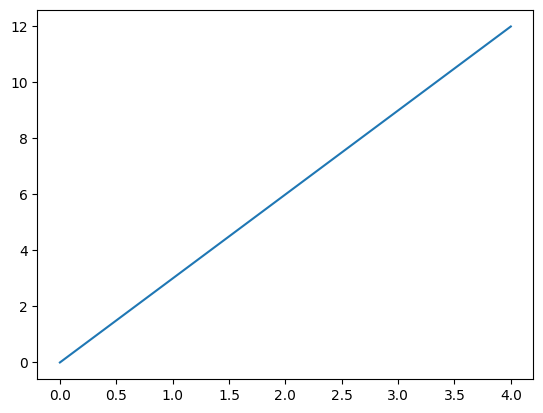

In [380]:
plt.plot(x,y)

In [384]:


def my_curve_function(x, a, b):
    return a*x + b

params, covariance = curve_fit(my_curve_function, xx, yy, method='lq')

ValueError: `method` must be 'trf', 'dogbox' or 'lm'.

In [382]:
print(params,covariance)

[ 3.0000000e+00 -1.7763568e-16] [[ 1.05181449e-33 -2.10362899e-33]
 [-2.10362899e-33  6.31088696e-33]]
